In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# what we need for today
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

import scikitplot as skplt

In [59]:
# https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Election08.csv
# https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MedGPA.csv

election_pd = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Election08.csv")
medGPA_pd = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/MedGPA.csv")


In [60]:
election_pd.head(5)

,Unnamed: 0,State,Abr,Income,HS,BA,Dem.Rep,ObamaWin
0,1,Alabama,AL,32404,80.4,21.4,-1,0
1,2,Alaska,AK,40352,90.5,26.0,-11,0
2,3,Arizona,AZ,33029,83.5,25.3,0,0
3,4,Arkansas,AR,30060,81.1,19.3,12,0
4,5,California,CA,41571,80.2,29.5,19,1


In [61]:
election_pd.isna().sum()

Unnamed: 0    0
State         0
Abr           0
Income        0
HS            0
BA            0
Dem.Rep       0
ObamaWin      0
dtype: int64

In [62]:
election = election_pd
election_pd.drop_duplicates()
election_pd = election_pd.iloc[: , 1:]
election_pd = election_pd.drop("Abr", 1)
election_pd = election_pd.drop("ObamaWin", 1)

C:\Users\Aditya\AppData\Local\Temp/ipykernel_3888/1615440808.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  election_pd = election_pd.drop("Abr", 1)
C:\Users\Aditya\AppData\Local\Temp/ipykernel_3888/1615440808.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  election_pd = election_pd.drop("ObamaWin", 1)


In [63]:
election_pd.isna().sum()

State      0
Income     0
HS         0
BA         0
Dem.Rep    0
dtype: int64

In [64]:
election_pd = election_pd.set_index("State")

In [65]:
election_pd.sample(3)

,Income,HS,BA,Dem.Rep
State,,,,
Colorado,41042,88.9,35.0,11
Mississippi,28845,78.5,18.9,1
New Mexico,31474,82.3,24.8,14


In [66]:
scaler = StandardScaler()
election_scaler = scaler.fit_transform(election_pd)

<AxesSubplot:>

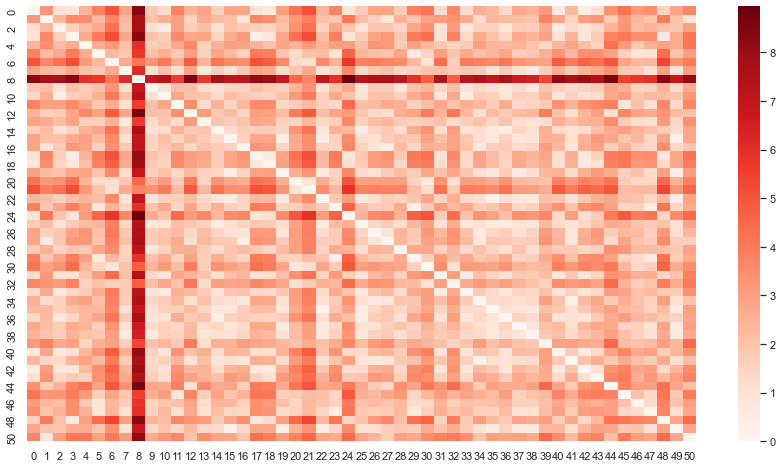

In [67]:
sns.set(rc = {'figure.figsize':(15,8)})
cdist = pdist(election_scaler)
cdist.shape
sns.heatmap(squareform(cdist), cmap="Reds")

In [68]:
hc1 = linkage(election_scaler, method="complete")
type(hc1)

numpy.ndarray

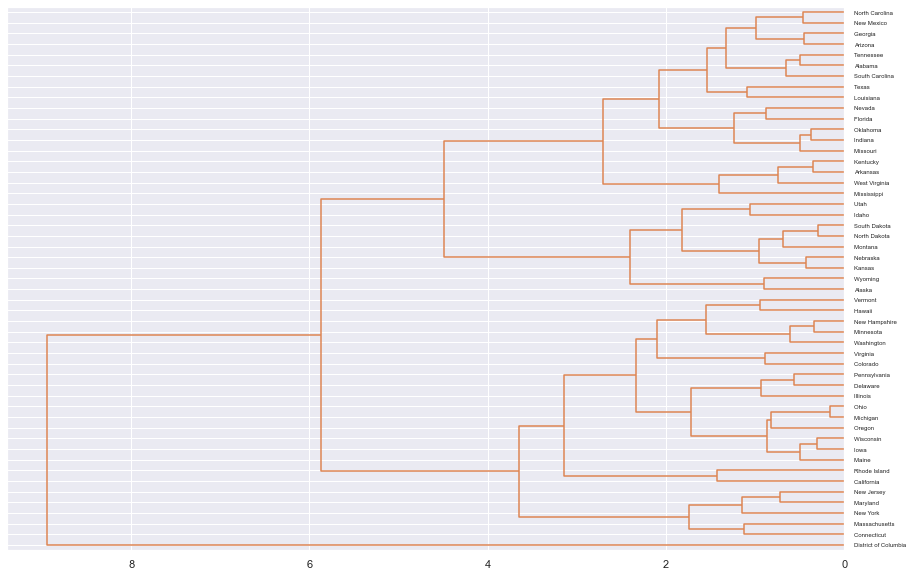

In [69]:
DIST = 80
plt.figure(figsize=(15,10))
dendrogram(hc1, 
           labels = election_pd.index,
           orientation = "left", 
           color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')
plt.show()

In [70]:
election['cluster1'] = fcluster(hc1, 4, criterion="maxclust")

In [71]:
election

,Unnamed: 0,State,Abr,Income,HS,BA,Dem.Rep,ObamaWin,cluster1
0,1,Alabama,AL,32404,80.4,21.4,-1,0,3
1,2,Alaska,AK,40352,90.5,26.0,-11,0,2
2,3,Arizona,AZ,33029,83.5,25.3,0,0,3
3,4,Arkansas,AR,30060,81.1,19.3,12,0,3
4,5,California,CA,41571,80.2,29.5,19,1,1
5,6,Colorado,CO,41042,88.9,35.0,11,1,1
6,7,Connecticut,CT,54117,88.0,34.7,26,1,1
7,8,Delaware,DE,40608,87.4,26.1,23,1,1
8,9,District of Columbia,DC,61092,85.7,47.5,75,1,4
9,10,Florida,FL,38444,84.9,25.8,9,1,3


In [72]:
election_cluster_group = election.groupby("cluster1")["ObamaWin"].mean()
election_cluster_group

cluster1
1    1.000000
2    0.000000
3    0.277778
4    1.000000
Name: ObamaWin, dtype: float64

# K-Mean

In [73]:
PROJECT = "ba820-329602"
SQL = "SELECT * from `questrom.datasets.judges`"
judges = pd.read_gbq(SQL, PROJECT)

In [74]:
judges.head(5)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN,judge
0,7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8,"ARMENTANO,A.J."
1,6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7,"ALEXANDER,J.M."
2,10.6,9.0,8.9,8.7,8.5,8.5,8.5,8.5,8.6,8.4,9.1,9.0,"CALLAHAN,R.J."
3,7.5,8.7,8.5,8.6,8.5,8.4,8.5,8.5,8.4,8.4,8.7,8.7,"MULVEY,H.M."
4,7.3,8.9,8.8,8.7,8.4,8.5,8.5,8.5,8.4,8.4,8.8,8.8,"SHEA,J.F.JR."


In [75]:
judges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CONT    43 non-null     float64
 1   INTG    43 non-null     float64
 2   DMNR    43 non-null     float64
 3   DILG    43 non-null     float64
 4   CFMG    43 non-null     float64
 5   DECI    43 non-null     float64
 6   PREP    43 non-null     float64
 7   FAMI    43 non-null     float64
 8   ORAL    43 non-null     float64
 9   WRIT    43 non-null     float64
 10  PHYS    43 non-null     float64
 11  RTEN    43 non-null     float64
 12  judge   43 non-null     object 
dtypes: float64(12), object(1)
memory usage: 4.5+ KB


In [76]:
judges.columns = judges.columns.str.lower()
judges.sample(3)

,cont,intg,dmnr,dilg,cfmg,deci,prep,fami,oral,writ,phys,rten,judge
10,7.1,8.5,8.3,8.0,7.9,7.9,7.8,7.8,7.8,7.7,8.3,8.2,"O'BRIEN,F.J."
11,7.1,8.4,8.4,7.7,7.5,7.7,7.8,8.2,8.0,8.1,8.3,8.1,"WRIGHT,D.B."
25,7.6,7.3,6.9,6.8,6.7,6.8,6.4,6.3,6.3,6.3,7.4,6.6,"MCGRATH,J.F."


In [77]:
judges.set_index("judge", inplace=True)
judges.sample(3)

,cont,intg,dmnr,dilg,cfmg,deci,prep,fami,oral,writ,phys,rten
judge,,,,,,,,,,,,
"PASKEY,L.",7.5,8.1,7.7,8.2,8.0,8.1,8.2,8.4,8.0,8.1,8.4,8.1
"DRISCOLL,P.J.",6.7,8.6,8.2,6.8,6.9,6.6,7.1,7.3,7.2,7.2,8.1,7.7
"MCGRATH,J.F.",7.6,7.3,6.9,6.8,6.7,6.8,6.4,6.3,6.3,6.3,7.4,6.6


In [78]:
judges.dtypes
judges.describe().T

,count,mean,std,min,25%,50%,75%,max
cont,43.0,7.437209,0.940877,5.7,6.85,7.3,7.90,10.6
intg,43.0,8.020930,0.770145,5.9,7.55,8.1,8.55,9.2
dmnr,43.0,7.516279,1.143705,4.3,6.90,7.7,8.35,9.0
dilg,43.0,7.693023,0.900898,5.1,7.15,7.8,8.45,9.0
cfmg,43.0,7.479070,0.860110,5.4,7.00,7.6,8.05,8.7
deci,43.0,7.565116,0.802936,5.7,7.10,7.7,8.15,8.8
prep,43.0,7.467442,0.953370,4.8,6.90,7.7,8.20,9.1
fami,43.0,7.488372,0.948987,5.1,6.95,7.6,8.25,9.1
oral,43.0,7.293023,1.010044,4.7,6.85,7.5,8.00,8.9
writ,43.0,7.383721,0.961133,4.9,6.90,7.6,8.05,9.0


In [79]:
# Fit our kirst K-Means -3 cluster
k3 = KMeans(3)
k3.fit(judges)

k3_labs = k3.predict(judges)
k3_labs

array([0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [80]:
k3.n_iter_

3

In [81]:
judges['k3'] = k3_labs

In [82]:
judges.sample(3)

,cont,intg,dmnr,dilg,cfmg,deci,prep,fami,oral,writ,phys,rten,k3
judge,,,,,,,,,,,,,
"GRILLO,A.E.",7.0,7.5,6.4,6.8,6.5,7.0,6.6,6.8,6.3,6.6,6.2,6.5,0
"O'SULLIVAN,T.J.",7.5,9.0,8.9,8.7,8.4,8.5,8.4,8.3,8.3,8.3,8.8,8.7,1
"DRISCOLL,P.J.",6.7,8.6,8.2,6.8,6.9,6.6,7.1,7.3,7.2,7.2,8.1,7.7,0


In [83]:
# start to profile/learn about our cluster 
judges.k3.value_counts()

1    23
0    15
2     5
Name: k3, dtype: int64

In [84]:
judges.groupby("k3").mean().T

k3,0,1,2
cont,7.326667,7.465217,7.64
intg,7.793333,8.486957,6.56
dmnr,7.240000,8.191304,5.24
dilg,7.240000,8.356522,6.00
cfmg,7.046667,8.113043,5.86
deci,7.146667,8.165217,6.06
prep,6.993333,8.178261,5.62
fami,7.013333,8.195652,5.66
oral,6.866667,8.021739,5.22
writ,6.946667,8.086957,5.46


In [85]:
j = judges.copy()
del j['k3']

In [86]:
k5 = KMeans(5)
k5.fit(j)

k5_labs = k5.predict(j)
k5_labs

array([2, 1, 1, 1, 1, 3, 3, 0, 4, 4, 2, 2, 1, 1, 3, 0, 4, 4, 4, 4, 2, 2,
       2, 2, 1, 0, 4, 0, 0, 2, 2, 2, 3, 0, 4, 0, 2, 2, 2, 1, 1, 1, 1])

In [87]:
j['k5'] = k5_labs
j.k5.value_counts()

2    13
1    11
4     8
0     7
3     4
Name: k5, dtype: int64

In [91]:
k5_profile = j.groupby("k5").mean().T

In [90]:
k5.cluster_centers_.shape

(5, 12)

<AxesSubplot:xlabel='k5'>

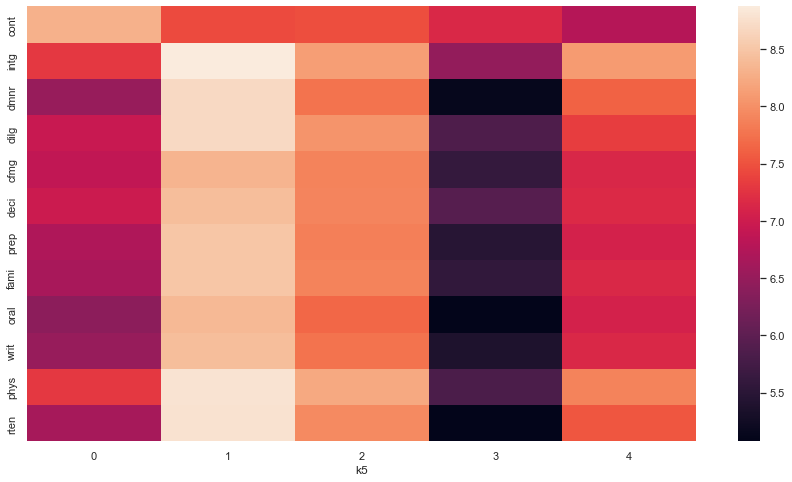

In [92]:
sns.heatmap(k5_profile)

In [103]:
# goodness of fit
jud = judges.copy()
del jud['k3']

containers = {}
for i in range(2,20):
    km = KMeans(i)
    km.fit(jud)
    km_lab = km.predict(jud)
    containers[i] = km.inertia_
    
containers 

{2: 196.33137096774192,
 3: 124.91536231884058,
 4: 91.50585470085471,
 5: 73.11458333333333,
 6: 62.84097619047618,
 7: 54.75947222222222,
 8: 47.97273015873015,
 9: 41.70870238095238,
 10: 36.32120238095237,
 11: 33.488119047619044,
 12: 30.013619047619045,
 13: 27.30845238095237,
 14: 25.63311904761904,
 15: 23.029285714285706,
 16: 20.58111904761904,
 17: 19.067999999999994,
 18: 16.813999999999997,
 19: 15.298666666666664}

C:\ProgramData\Anaconda3\envs\ba820\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

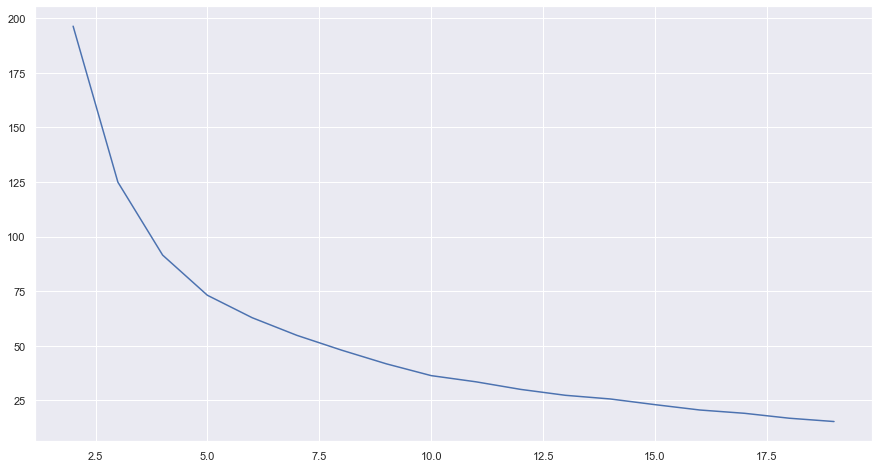

In [104]:
sns.lineplot(containers.keys(),containers.values())

In [105]:
# silo scores -K5
k5.inertia_

73.20451923076924

In [107]:
silo_overall = metrics.silhouette_score(jud, k5_labs)
silo_overall

0.31619556674145366

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

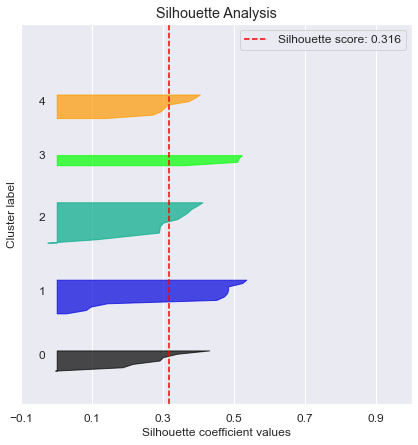

In [114]:
silo_sample =  metrics.silhouette_score(jud, k5_labs)
skplt.metrics.plot_silhouette(jud, k5_labs, figsize=(7,7))

In [112]:
containers = {}
for i in range(2,20):
    km = KMeans(i)
    km.fit(jud)
    km_lab = km.predict(jud)
    containers[i] = [km.inertia_,metrics.silhouette_score(jud, km_lab)]
    
containers 

{2: [196.04326704545457, 0.4970798532852451],
 3: [124.91536231884058, 0.38772007390873103],
 4: [91.50585470085471, 0.34066458321628734],
 5: [72.61569444444446, 0.3182698404437354],
 6: [62.62383333333332, 0.325026542832868],
 7: [56.24468589743589, 0.3043266186035656],
 8: [47.67067857142857, 0.3047711087296681],
 9: [43.38327380952381, 0.28268806129543933],
 10: [36.32120238095237, 0.30488421607617655],
 11: [32.90534523809523, 0.2969144687905681],
 12: [30.257904761904758, 0.24889837835545983],
 13: [26.85845238095237, 0.23895954168675512],
 14: [24.631595238095233, 0.2681339471996224],
 15: [22.06778571428571, 0.25693450264041073],
 16: [20.786119047619046, 0.24246110822771064],
 17: [18.973833333333328, 0.22252107150606656],
 18: [16.354833333333332, 0.2625965580553523],
 19: [15.189833333333333, 0.24591978637134748]}